## Intro to using StatsBomb data for match analysis

In [83]:
pip install statsbombpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import the event data 

In [84]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install matplotlib --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install mplsoccer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [87]:
from statsbombpy import sb
import pandas as pd
from pandas import json_normalize
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch, Sbopen

# Get competitions
comp = sb.competitions()
comp.to_csv('competitions.csv', index=False)



In [88]:
# Get Matches from 2022 FIFA World Cup
df = sb.matches(competition_id=43, season_id=106)
df.to_csv('WC_Matches.csv', index=False)
df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3869254,2022-12-06,21:00:00.000,International - FIFA World Cup,2022,Portugal,Switzerland,6,1,available,...,2023-01-14T15:08:46.172894,4,Round of 16,Lusail Stadium,César Arturo Ramos Palazuelos,Fernando Manuel Fernandes da Costa Santos,Murat Yakin,1.1.0,2,2
1,3869118,2022-12-04,21:00:00.000,International - FIFA World Cup,2022,England,Senegal,3,0,available,...,2022-12-13T21:39:52.223504,4,Round of 16,Al Bayt Stadium,Ivan Arcides Barton Cisneros,Gareth Southgate,Aliou Cissé,1.1.0,2,2
2,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,...,2023-01-04T12:36:10.102347,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,Hoalid Regragui,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
3,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2022-12-21T16:02:21.075183,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2
4,3869684,2022-12-17,17:00:00.000,International - FIFA World Cup,2022,Croatia,Morocco,2,1,available,...,2022-12-18T21:30:47.341680,7,3rd Place Final,Sheikh Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Zlatko Dalić,Hoalid Regragui,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3857260,2022-11-30,21:00:00.000,International - FIFA World Cup,2022,Saudi Arabia,Mexico,1,2,available,...,2022-12-01T19:56:40.363859,3,Group Stage,Lusail Stadium,Michael Oliver,Hervé Renard,Gerardo Daniel Martino,1.1.0,2,2
60,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2022-12-06T17:57:00.355945,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
61,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2022-12-21T16:01:27.541055,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
62,3857255,2022-12-01,21:00:00.000,International - FIFA World Cup,2022,Japan,Spain,2,1,available,...,2022-12-21T15:58:42.193326,3,Group Stage,Sheikh Khalifa International Stadium,Victor Miguel de Freitas Gomes,Hajime Moriyasu,Luis Enrique Martínez García,1.1.0,2,2


In [89]:

# Find a match_id required
match = 3869118
match_events = sb.events(match_id=match)
match_events

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",England,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Senegal,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Senegal,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Senegal,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Kalvin Phillips,NaN,England,00:36:09.397,Substitution,NaN
3496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Fodé Ballo Touré,NaN,Senegal,00:38:54.020,Substitution,NaN
3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Senegal,00:00:04.078,Tactical Shift,NaN
3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Senegal,00:26:20.885,Tactical Shift,NaN


In [90]:
first_half = match_events.loc[match_events['period'] == 1] 
second_half = match_events.loc[match_events['period'] == 2] 
second_half.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Senegal,00:00:00.000,Half Start,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England,00:00:00.000,Half Start,NaN
514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England,00:00:00.506,Pass,NaN
515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England,00:00:03.076,Pass,NaN
516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England,00:00:15.295,Pass,NaN


In [91]:
match_events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_inswinging', 'pass_length',

In [92]:
pass_raw = first_half[match_events.type== 'Pass']
pass_raw.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Senegal,00:00:00.828,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Senegal,00:00:05.092,Pass,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Senegal,00:00:06.467,Pass,True
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Senegal,00:00:08.660,Pass,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Senegal,00:00:09.442,Pass,NaN


In [93]:
pass_number_raw = pass_raw[['timestamp', 'player', 'pass_recipient']]
pass_number_raw.head()

,timestamp,player,pass_recipient
6,00:00:00.828,Iliman Ndiaye,Kalidou Koulibaly
7,00:00:05.092,Kalidou Koulibaly,Pathé Ismaël Ciss
8,00:00:06.467,Pathé Ismaël Ciss,Abdou Diallo
9,00:00:08.660,Abdou Diallo,Nampalys Mendy
10,00:00:09.442,Nampalys Mendy,Kalidou Koulibaly


In [94]:
pass_number_raw['pair'] = pass_number_raw.player + pass_number_raw.pass_recipient
pass_number_raw.head()

/var/folders/6h/6k3qgyf57t36w9tvygh1x2wc0000gn/T/ipykernel_23234/1817612259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_number_raw['pair'] = pass_number_raw.player + pass_number_raw.pass_recipient


,timestamp,player,pass_recipient,pair
6,00:00:00.828,Iliman Ndiaye,Kalidou Koulibaly,Iliman NdiayeKalidou Koulibaly
7,00:00:05.092,Kalidou Koulibaly,Pathé Ismaël Ciss,Kalidou KoulibalyPathé Ismaël Ciss
8,00:00:06.467,Pathé Ismaël Ciss,Abdou Diallo,Pathé Ismaël CissAbdou Diallo
9,00:00:08.660,Abdou Diallo,Nampalys Mendy,Abdou DialloNampalys Mendy
10,00:00:09.442,Nampalys Mendy,Kalidou Koulibaly,Nampalys MendyKalidou Koulibaly


In [95]:
pass_count = pass_number_raw.groupby(['pair']).count().reset_index()
pass_count = pass_count[['pair', 'timestamp']]
pass_count.columns = ['pair', 'number_pass']
pass_count.head()

,pair,number_pass
0,Abdou DialloBoulaye Dia,1
1,Abdou DialloEdouard Mendy,2
2,Abdou DialloIsmail Jakobs,4
3,Abdou DialloIsmaïla Sarr,4
4,Abdou DialloKalidou Koulibaly,3


In [96]:
avg_loc_df = pass_raw[['team', 'player', 'location']]
avg_loc_df.head()

,team,player,location
6,Senegal,Iliman Ndiaye,"[61.0, 40.1]"
7,Senegal,Kalidou Koulibaly,"[41.8, 48.1]"
8,Senegal,Pathé Ismaël Ciss,"[53.4, 41.3]"
9,Senegal,Abdou Diallo,"[45.2, 30.5]"
10,Senegal,Nampalys Mendy,"[55.3, 28.5]"


In [97]:
import numpy as np

avg_loc_df['pos_x'] = avg_loc_df.location.apply(lambda x: x[0])
avg_loc_df['pos_y'] = avg_loc_df.location.apply(lambda x: x[1])
avg_loc_df = avg_loc_df.drop('location', axis=1)

avg_loc_df = avg_loc_df.groupby(['team','player']).agg({'pos_x': np.mean, 'pos_y': np.mean}).reset_index()

avg_loc_df.head()

/var/folders/6h/6k3qgyf57t36w9tvygh1x2wc0000gn/T/ipykernel_23234/1041450845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_loc_df['pos_x'] = avg_loc_df.location.apply(lambda x: x[0])
/var/folders/6h/6k3qgyf57t36w9tvygh1x2wc0000gn/T/ipykernel_23234/1041450845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_loc_df['pos_y'] = avg_loc_df.location.apply(lambda x: x[1])


,team,player,pos_x,pos_y
0,England,Bukayo Saka,65.100000,61.400000
1,England,Declan Rice,54.764000,32.124000
2,England,Harry Kane,81.180000,32.393333
3,England,Harry Maguire,44.200000,16.304167
4,England,John Stones,37.454717,46.562264


In [98]:
pass_merge = pass_number_raw.merge(pass_count, on='pair')
pass_merge = pass_merge[['player', 'pass_recipient', 'number_pass']]
pass_merge = pass_merge.drop_duplicates()
pass_merge.head()

,player,pass_recipient,number_pass
0,Iliman Ndiaye,Kalidou Koulibaly,2
2,Kalidou Koulibaly,Pathé Ismaël Ciss,5
7,Pathé Ismaël Ciss,Abdou Diallo,4
11,Abdou Diallo,Nampalys Mendy,5
16,Nampalys Mendy,Kalidou Koulibaly,5


In [99]:
avg_loc_df = avg_loc_df[['player', 'pos_x', 'pos_y']]

pass_cleaned = pass_merge.merge(avg_loc_df, on='player')
pass_cleaned.rename({'pos_x': 'pos_x_start', 'pos_y': 'pos_y_start'}, axis='columns', inplace=True)

pass_cleaned = pass_cleaned.merge(avg_loc_df, left_on='pass_recipient', right_on='player', suffixes=['', '_end'])
pass_cleaned.rename({'pos_x': 'pos_x_end', 'pos_y': 'pos_y_end'}, axis='columns', inplace=True)

# pass_cleaned = pass_cleaned.drop(['player_name_end'], axis=1)
pass_cleaned.head()

,player,pass_recipient,number_pass,pos_x_start,pos_y_start,player_end,pos_x_end,pos_y_end
0,Iliman Ndiaye,Kalidou Koulibaly,2,73.622222,61.166667,Kalidou Koulibaly,34.234615,57.107692
1,Pathé Ismaël Ciss,Kalidou Koulibaly,2,53.369565,55.126087,Kalidou Koulibaly,34.234615,57.107692
2,Abdou Diallo,Kalidou Koulibaly,3,43.365217,18.700000,Kalidou Koulibaly,34.234615,57.107692
3,Nampalys Mendy,Kalidou Koulibaly,5,60.656522,35.426087,Kalidou Koulibaly,34.234615,57.107692
4,Youssouf Sabaly,Kalidou Koulibaly,5,52.141176,73.594118,Kalidou Koulibaly,34.234615,57.107692


In [100]:
eng_player_df = first_half[first_half.team == 'England'].groupby('player').agg({'minute': [min, max]}).reset_index()
eng_player_df = pd.concat([eng_player_df['player'], eng_player_df['minute']], axis=1)
eng_player_df['minutes_played'] = eng_player_df['max'] - eng_player_df['min']
eng_player_df = eng_player_df.sort_values('minutes_played', ascending=False)
eng_player_df

,player,min,max,minutes_played
2,Harry Kane,0,47,47
7,Jude Bellingham,0,47,47
8,Kyle Walker,0,47,47
10,Philip Foden,0,47,47
3,Harry Maguire,0,45,45
5,Jordan Brian Henderson,0,45,45
6,Jordan Pickford,0,45,45
9,Luke Shaw,0,45,45
1,Declan Rice,0,44,44
4,John Stones,1,44,43


In [101]:
eng_player_names = eng_player_df.player[:11].tolist()

pass_eng = pass_cleaned[pass_cleaned.player.isin(eng_player_names)]
pass_eng = pass_eng[pass_eng.pass_recipient.isin(eng_player_names)]

print(pass_eng.shape)
pass_eng.head()

(85, 8)


,player,pass_recipient,number_pass,pos_x_start,pos_y_start,player_end,pos_x_end,pos_y_end
64,Philip Foden,Declan Rice,1,85.513043,14.108696,Declan Rice,54.764,32.124
65,Luke Shaw,Declan Rice,4,69.494286,4.897143,Declan Rice,54.764,32.124
66,Harry Maguire,Declan Rice,1,44.200000,16.304167,Declan Rice,54.764,32.124
67,John Stones,Declan Rice,7,37.454717,46.562264,Declan Rice,54.764,32.124
68,Kyle Walker,Declan Rice,2,49.592105,63.950000,Declan Rice,54.764,32.124


In [102]:
pass_eng['width'] = pass_eng['number_pass'] / pass_eng['number_pass'].max()
pass_eng.head()

,player,pass_recipient,number_pass,pos_x_start,pos_y_start,player_end,pos_x_end,pos_y_end,width
64,Philip Foden,Declan Rice,1,85.513043,14.108696,Declan Rice,54.764,32.124,0.0625
65,Luke Shaw,Declan Rice,4,69.494286,4.897143,Declan Rice,54.764,32.124,0.2500
66,Harry Maguire,Declan Rice,1,44.200000,16.304167,Declan Rice,54.764,32.124,0.0625
67,John Stones,Declan Rice,7,37.454717,46.562264,Declan Rice,54.764,32.124,0.4375
68,Kyle Walker,Declan Rice,2,49.592105,63.950000,Declan Rice,54.764,32.124,0.1250


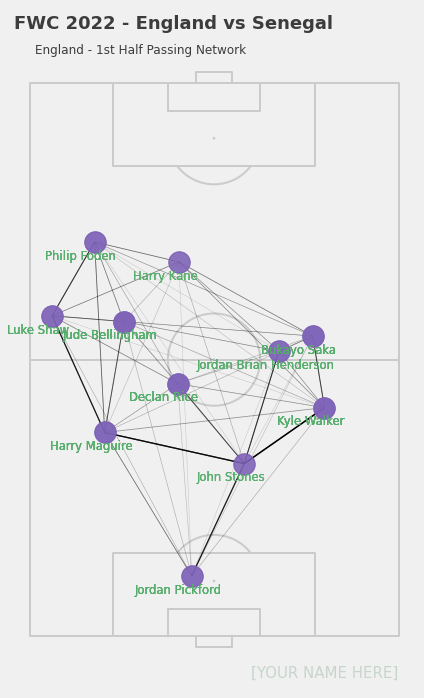

In [103]:
from matplotlib.colors import to_rgba
import matplotlib.style as style


style.use('fivethirtyeight')

MIN_TRANSPARENCY = 0.1
color = np.array(to_rgba('black'))
color = np.tile(color, (len(pass_eng), 1))
c_transparency = pass_eng.number_pass / pass_eng.number_pass.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

pitch = VerticalPitch(pitch_type='statsbomb', 
    half = False,
    axis = True, 
    # label = True, 
    # tick = True,
    goal_type='box')
    
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)

# fig.set_facecolor("#FFFFFF")

pass_lines = pitch.lines(pass_eng.pos_x_start, pass_eng.pos_y_start,
                         pass_eng.pos_x_end, pass_eng.pos_y_end, 
                         lw=pass_eng.width+0.5,
                         color=color, zorder=1, ax=axs['pitch'])

pass_nodes = pitch.scatter(pass_eng.pos_x_start, pass_eng.pos_y_start, s=450,
                           color= '#7f63b8', linewidth=1, alpha=0.3, ax=axs['pitch'])

for index, row in pass_eng.iterrows():
    pitch.annotate(row.player, xy=(row.pos_x_start-3, row.pos_y_start-3), c='#56ae6c', va='center',
                   ha='center', size='small', weight = 'light', family='sans-serif', ax=axs['pitch'],stretch= 'ultra-condensed',style="normal" ,alpha=0.5)
    
# endnote /title
axs['endnote'].text(1, 0.5, '[YOUR NAME HERE]', color='#c7d5cc',
                    va='center', ha='right', fontsize=15)

# axs['endnote'].text(0.5, 0.9, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12)
# axs['endnote'].arrow(0.4, 0.6, 0.2, 0, head_width=0.25, head_length=0.025, ec='w', fc='w')
# axs['endnote'].set_xlim(0, 1)
# axs['endnote'].set_ylim(0, 1)

axs['title'].text(0.4, 0.7, 'FWC 2022 - England vs Senegal ', weight = 'bold', alpha = .75,
                  va='center', ha='center', fontsize=18)
axs['title'].text(0.3, 0.25, 'England - 1st Half Passing Network',
                  va='center', ha='center', alpha = .75, fontsize=12)
plt.savefig('Passing Networks.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# TODO
# CONVERT ABOVE CODE INTO DYTNAMIC FUNCTIONS FOR 1-CLICK GENERATION 
#   - BOTH TEAMS
#   - ADD LOGOS TO TITLE 
#   - ADD TILE TO LEFT TO SHOW LEADERBOARD/TABLE 



# NEXT TO ADD 
# https://github.com/sharmaabhishekk/random_stuff/blob/master/misc_vizzes/pitch_on_pitch_formation.ipynb

In [104]:
shot_raw = match_events[match_events.type== 'Shot']
shot_raw.head()


,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
3465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.083668,Normal,Open Play,NaN,NaN,NaN,England,00:20:25.796,Shot,NaN
3466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.053363,Volley,Open Play,NaN,NaN,NaN,Senegal,00:21:59.179,Shot,NaN
3467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.629174,Half Volley,Open Play,NaN,NaN,NaN,Senegal,00:22:00.357,Shot,NaN
3468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035875,Normal,Open Play,NaN,NaN,NaN,Senegal,00:31:01.162,Shot,NaN
3469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.131749,Normal,Open Play,NaN,NaN,NaN,England,00:38:00.756,Shot,NaN


In [105]:
shot_raw.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_inswinging', 'pass_length',

In [106]:
shot_raw["location"] = shot_raw["location"].astype(str)
shot_raw["location"] = shot_raw["location"].str[1:]
shot_raw["location"] = shot_raw["location"].str[:-1]
shot_raw[["location"]]
shot_raw[["x", "y"]] = shot_raw["location"].str.split(",", expand=True).astype(np.float32)

/var/folders/6h/6k3qgyf57t36w9tvygh1x2wc0000gn/T/ipykernel_23234/2117207732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_raw["location"] = shot_raw["location"].astype(str)
/var/folders/6h/6k3qgyf57t36w9tvygh1x2wc0000gn/T/ipykernel_23234/2117207732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_raw["location"] = shot_raw["location"].str[1:]
/var/folders/6h/6k3qgyf57t36w9tvygh1x2wc0000gn/T/ipykernel_23234/2117207732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [107]:
shot_raw.shot_outcome.unique()

array(['Off T', 'Blocked', 'Saved', 'Goal'], dtype=object)

In [79]:
xg = shot_raw[['team','minute','type','shot_statsbomb_xg','x','y',"shot_outcome"]]
team_xg = xg[xg['team']=='England'].reset_index()
team_xg

,index,team,minute,type,shot_statsbomb_xg,x,y,shot_outcome
0,3465,England,20,Shot,0.083668,13.500000,45.0,Off T
1,3469,England,38,Shot,0.131749,7.600000,38.0,Goal
2,3470,England,40,Shot,0.184229,10.000000,39.0,Off T
3,3471,England,47,Shot,0.206643,4.300000,50.0,Goal
4,3473,England,53,Shot,0.035188,7.700000,53.0,Off T
5,3474,England,55,Shot,0.015214,0.500000,27.0,Saved
6,3475,England,56,Shot,0.217389,11.000000,35.0,Goal
7,3481,England,90,Shot,0.145943,17.799999,45.0,Off T


In [108]:
goals = team_xg[team_xg['shot_outcome'=="Goal"]]

'8'

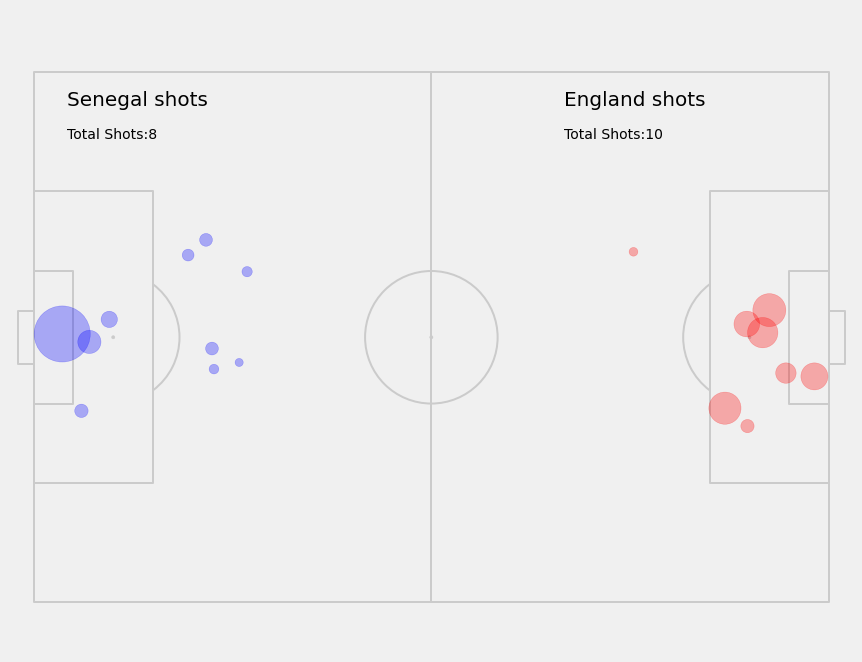

In [109]:
import seaborn as sns
from mplsoccer import Pitch

def generateTeamxGDataFrame(team):
    xg = shot_raw[['team','minute','type','shot_statsbomb_xg','x','y',"shot_outcome"]]
    team_xg = xg[xg['team']==team].reset_index()
    return team_xg
    

def generateCombinedShotMap(team1,team2):
    team1_xg = generateTeamxGDataFrame(team1)
    team2_xg = generateTeamxGDataFrame(team2)
    team1_shots = team1_xg[team1_xg.type=='Shot']
    team2_shots = team2_xg[team2_xg.type=='Shot']
    pitch = Pitch(pitch_type='statsbomb', 
    half = False,
    axis = True, 
    # label = True, 
    # tick = True,
    goal_type='box')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(team1_shots.x, team1_shots.y, alpha = 0.3, s = team1_shots.shot_statsbomb_xg*5000, color = "red", ax=ax['pitch'],)
    pitch.scatter(120-team2_shots.x, 80-team2_shots.y, alpha = 0.3, s = team2_shots.shot_statsbomb_xg*5000, color = "blue", ax=ax['pitch'],)
    ax['pitch'].text(5, 5, team2 + ' shots',size=20)
    ax['pitch'].text(5, 10, f'Total Shots:' + str(len(team1_xg)))
    ax['pitch'].text(80, 5, team1 + ' shots',size=20)
    ax['pitch'].text(80, 10, f'Total Shots:' + str(len(team2_xg)))
 
 
 # calling the function
generateCombinedShotMap('England','Senegal')

# TODO
# Add title 
# goals subtitle 
# arrows 
# highlight off t, saved and goals 

range(1, 18)

In [19]:
fig = plt.figure(figsize = (8,8), dpi = 100)
ax = plt.subplot(111)

# Notice the extra parameters passed to the object
pitch = VerticalPitch(
    pitch_type = "statsbomb",
    half = False,
    axis = True, 
    label = True, 
    tick = True,
    goal_type='box'
)

pitch.draw(ax = ax)


NoneType